## Analisis "Diabetes Patients Data"

Este conjunto de datos proviene del Instituto Nacional de Diabetes y
Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes

Los datos originales pueden ser descargados del siguiente link: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset

En base a los datos proporcionados vamos a resolver ciertas preguntas para determinar ciertos criterios en base a estas comparativas:
- Comparacion de niveles de insulina y edad
- Relacion de skinthickness e IMC
- Subdividir en 6 grupos el campo diabetespedigreefunction
- Porcentaje de los resultados



In [1]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Procedemos a la lectura de datos y exploracion de datos
from google.colab import drive
drive.mount('/gdrive')
ruta = "/gdrive/MyDrive/diabetes.csv"
data = pd.read_csv(ruta)

Mounted at /gdrive


In [3]:
print(data.shape) # 768 filas y 9 columnas

(768, 9)


In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Los tipos de varaibles
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
# Verificacion de valores nulos
pd.DataFrame(data.isnull().sum(), columns = ['Missing Values'])

,Missing Values
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [7]:
#Verificamos las columnas numericas para obtener valores de interes
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


A simple vista podemos observar que existen valores de 0 en los campos de "skinThickness" y BMI, lo cual es medicamente muy improbable, ya que en el caso de grosor de la piel, las personas tienen algo de grasa subcutánea en el cuerpo, incluso las personas más delgadas y atléticas, en el caso de BMI; Un BMI de 0 implicaría que el peso de la persona es 0, lo cual es físicamente imposible.
Vamos a proceder a contar cuantos de estos valores exiten en estos campos para saber si es viable eliminar estos registros de forma que no perjudiquen en nuestras futuras observaciones.

In [8]:

valor_a_contar = 0  # Valor que deseamos contar
conteo = data['SkinThickness'].apply(lambda x: x == valor_a_contar).sum()
print("Número de veces que aparece el valor en la columna:", conteo)


Número de veces que aparece el valor en la columna: 227


In [9]:
conteo_2 = data['BMI'].apply(lambda x: x == valor_a_contar).sum()
print("Número de veces que aparece el valor en la columna:", conteo_2)


Número de veces que aparece el valor en la columna: 11


En el caso de "SkinThickness', es bastante considerable la cantidad de registros con valores en "0", en total son 227, lo mas probable es que no hayan realizado esa medicion a ese grupo de pacientes, en el caso de "BMI", no son muchos casos en "0", en total son 11.
Vamos a conservar estos datos para proseguir con las futuras observaciones y vamos a obviarlos, a pesar que tenemos una comparacion pendiente, entre estos 2 campos.

# **Comparacion de niveles de insulina y edades**
Esta relacion pretende demostrar si existe un crecimiento en los niveles de insulina a medida que progresa la edad en los pacientes.



In [10]:
# Crearemos una tabla
rango_de_edades = ['20:30', '31:40', '41:50', '51:60', '61:70', '71:81']
limites_edades = [20, 30, 40, 50, 60, 70, 80]
niveles_de_insulina = ['0:99','100:125','126:846']
limites_insulina = [-1, 99, 125, 846]


data['Group of Ages'] = pd.cut(data['Age'], bins=limites_edades, labels=rango_de_edades)
data['level of Insulin'] = pd.cut(data['Insulin'], bins=limites_insulina, labels=niveles_de_insulina)
# Creamos un DataFrame agregado que cuente los registros por nivel de insulina y grupo de edades
aggregated_data = data.groupby(['level of Insulin', 'Group of Ages']).size().reset_index(name='Count')



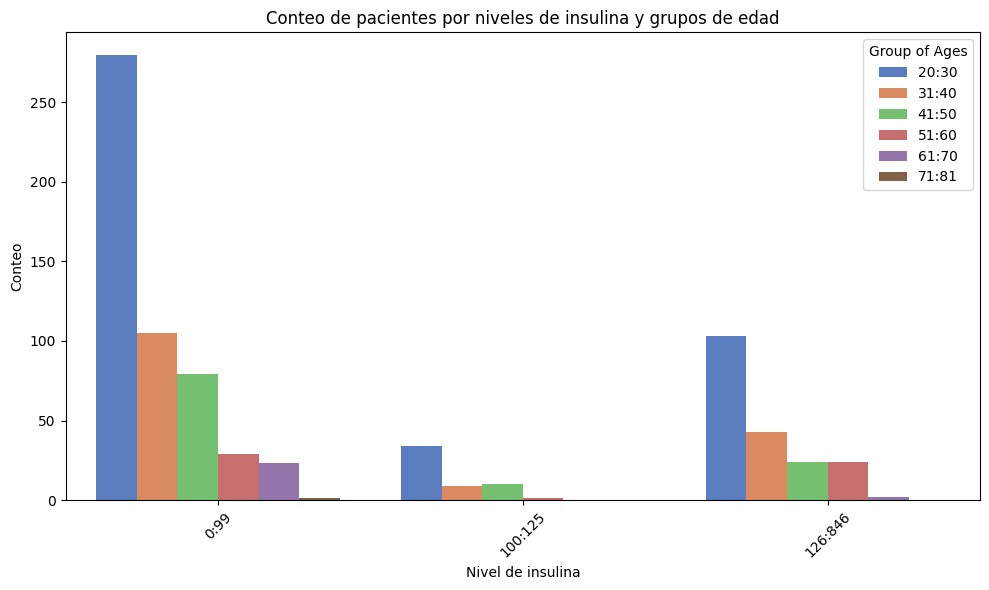

In [11]:
#Vamos a crear el grafico para estas dos nuevas columnas
plt.figure(figsize=(10, 6))
sns.barplot(data=aggregated_data, x='level of Insulin', y='Count', hue='Group of Ages', palette='muted')

## Etiquetas y Titulos
plt.xlabel('Nivel de insulina')
plt.ylabel('Conteo')
plt.title('Conteo de pacientes por niveles de insulina y grupos de edad')

# Rotacion de las etiquetas del eje x para una mejor legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

###**Primera observacion**
Se puede observar que el grupo predominante es el de pacientes de 20 a 30 años de edad, a simple viste estos pacientes son la mayoria y no hay muchos pacientes de 71 a 81 años.

# **Relacion de "skinthickness" e "IMC"**
Esta relacion pretende demostrar si existe una relacion entre los registros de Skinthickness e IMC

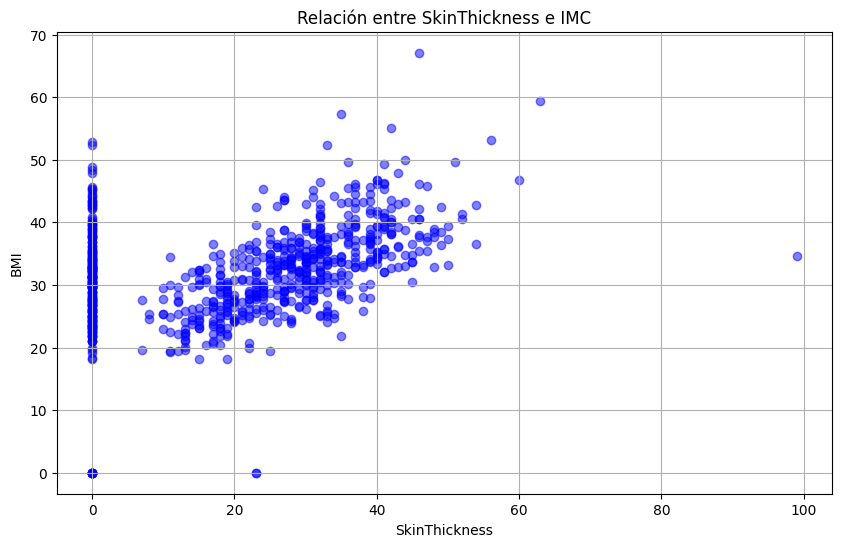

In [12]:
# Crearemos una gráfica de dispersión de SkinThickness vs IMC
plt.figure(figsize=(10, 6))
plt.scatter(data['SkinThickness'], data['BMI'], alpha=0.5, color='b')

# Agregar etiquetas y título
plt.xlabel('SkinThickness')
plt.ylabel('BMI')
plt.title('Relación entre SkinThickness e IMC')

# Mostrar la gráfica
plt.grid(True)
plt.show()

In [13]:
# Calculamos el coeficiente de correlación entre BMI y SkinThickness usando Pandas
correlation = data['BMI'].corr(data['SkinThickness'])
print("Coeficiente de correlación :", correlation)


Coeficiente de correlación : 0.3925732041590384


###**Segunda observacion**
Observamos en la grafica que hay una despersion considerable, pero tambien se forma una ligera linea e inclinacion, por eso se procedio a ver el calculo de correlacion y evidentemente un coeficiente de 0.3 redondeando a 0.4, se queda un tanto corto para definirlo como una relacion estrecha, quiero aclarar que este punto se realizo por curiosidad del autor.

#**Subdividir en 6 grupos el campo diabetespedigreefunction**

In [14]:
# Definimos los límites para los 6 grupos
limites_grupos = [0, 0.2, 0.4, 0.6, 0.8, 1.0, max(data['DiabetesPedigreeFunction'])]

# Etiquetas para los grupos
etiquetas_grupos = ['Grupo 1', 'Grupo 2', 'Grupo 3', 'Grupo 4', 'Grupo 5', 'Grupo 6']

# Aplicamos la subdivisión en grupos
data['DiabetesPedigreeGroup'] = pd.cut(data['DiabetesPedigreeFunction'], bins=limites_grupos, labels=etiquetas_grupos)

# Se Muestra el DataFrame resultante
print(data[['DiabetesPedigreeFunction', 'DiabetesPedigreeGroup']])

     DiabetesPedigreeFunction DiabetesPedigreeGroup
0                       0.627               Grupo 4
1                       0.351               Grupo 2
2                       0.672               Grupo 4
3                       0.167               Grupo 1
4                       2.288               Grupo 6
..                        ...                   ...
763                     0.171               Grupo 1
764                     0.340               Grupo 2
765                     0.245               Grupo 2
766                     0.349               Grupo 2
767                     0.315               Grupo 2

[768 rows x 2 columns]


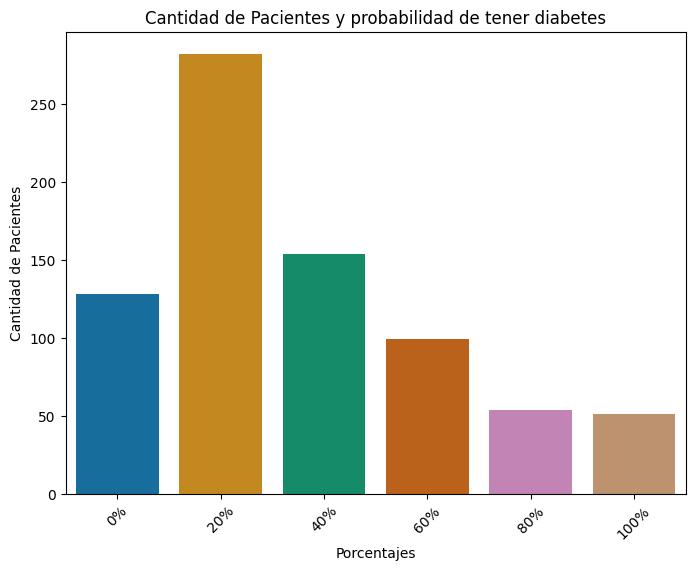

In [15]:

# Definimos los límites para los 6 grupos
limites_grupos = [0, 0.2, 0.4, 0.6, 0.8, 1.0, max(data['DiabetesPedigreeFunction'])]

# Etiquetas para los grupos
etiquetas_grupos = ['0%', '20%', '40%', '60%', '80%', '100%']

# Aplicamos la subdivisión en grupos
data['DiabetesPedigreeGroup'] = pd.cut(data['DiabetesPedigreeFunction'], bins=limites_grupos, labels=etiquetas_grupos)

# Conteo de los datos en cada grupo
conteo_grupos = data['DiabetesPedigreeGroup'].value_counts()

# Crearemos un gráfico de barras con colores diferentes para cada barra
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_grupos.index, y=conteo_grupos.values, palette='colorblind')
plt.xlabel('Porcentajes')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes y probabilidad de tener diabetes')
plt.xticks(rotation=45)
plt.show()


###**Tercera observacion**
Es necesario entender que esta observacion usa como base el "diabetes pedigree function". Que es un función que asigna la probabilidad de padecer diabetes a partir de la historia familiar

El grupo mas numeroso solo tiene un 20% de probalidades de sufrir por diabetes, El segundo un 40% y el tercero tiene practicamente posibilidades nulas.

#**Porcentaje de los resultados**

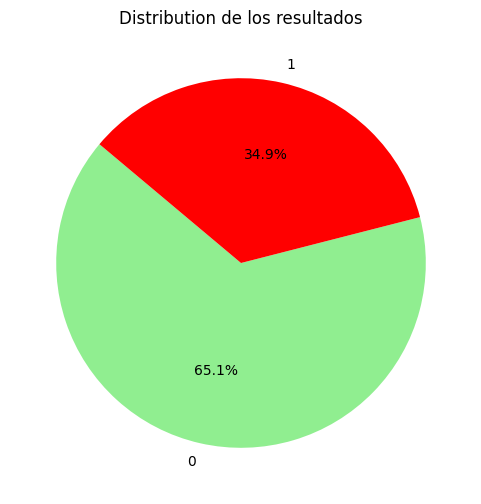

In [16]:
# Calculamos los porcentajes de cada categoría en la columna 'Outcome'
Percentage = data['Outcome'].value_counts() / len(data) * 100

# Etiquetas para las categorías
labels = Percentage.index

# Valores para cada categoría
sizes = Percentage.values

# Colores para cada categoría
colors = ['lightgreen', 'red']

# Creamos un pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution de los resultados')
plt.show()


###**Ultima observacion**
Los resultados de las pruebas indican que un 65% de los pacientes no tienen diabetes y un 35% dio positivo a esta enfermedad.texto en negrita

Espero que esta libreta de notas haya sido de interes del publico y pueda encontar observaciones que puedan ayudar a mejorar este estudio, muchas gracias.